<a href="https://colab.research.google.com/github/girotodenis/semisupervisionada/blob/master/Lista_RL_2019_1_Davi_Denis_Naiara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lista de Exercícios - Reinforcement Learning

NOME COMPLETO DOS INTEGRANTES DO GRUPO:
**Davi Miranda Gonçalves**, 
**Denis SIlva Giroto**,
**Naiara Moura Pires**

MATRÍCULAS DOS INTEGRANTES DO GRUPO:
**1931143030**,
**1931143029**,
**1931143033**


**AVISOS**:

- **Mantenha a estrutura de enunciados e células de resposta da lista original na lista a ser entregue.**
- **Todas as análises e justificativas solicitadas devem estar acompanhadas de códigos e plots realizados.**
- **As listas deverão ser compartilhadas no e-mail nguerinjr@gmail.com .**

# EXERCÍCIOS

In [32]:
actions8 = [  
              (-1, -1), (-1, 0), (-1, 1),
              ( 0, -1),          ( 0, 1),
              ( 1,  1), ( 1, 0), ( 1, 1)
          ]
pcardeais8 = [
            '↖','↥','↗',
            '↤',     '↦',
            '↘','↧','↙']

actions4 = [  
                    (-1, 0),
          (0, -1),          (0, 1),
                    (1,  0)
          ]

pcardeais4 = [
                 '↥',
            '↤',     '↦',
                 '↧']
  
print(pcardeais8)

['↖', '↥', '↗', '↤', '↦', '↘', '↧', '↙']


In [33]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import random      
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random', 'gamma']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [34]:
class Mundo:
    
  def __init__(self, y, x, i, f, pcardeais, actions, forca_vento_coluna, variacao_vento=False):
        
      self.row = y 
      self.col = x
      
      self.pcardeais = pcardeais
      self.actions = actions
        
      self.grade = [ (row, col) for row in range(self.row) for col in range(self.col)]
      self.forca_vento_coluna = forca_vento_coluna
      self.inicio = i
      self.fim = f
      self.grade = [ (row, col) for row in range(self.row) for col in range(self.col)]
      self.movimentos = []
      self.variacao_vento = variacao_vento
      
  def is_inicio(self, posicao):
      return posicao[0] == self.inicio[0] and posicao[1] == self.inicio[1]

  def is_fim(self, posicao):
      return posicao[0] == self.fim[0] and posicao[1] == self.fim[1]

  def pcardeal_to_action(self, pcardeal):
      indexes = [i for i,x in enumerate(self.pcardeais) if x == pcardeal]
      return self.actions[indexes[0]]

  def action_to_pcardeal(self, action):
      indexes = [i for i,x in enumerate(self.actions) if x == action]
      return self.pcardeais[indexes[0]]
      
  def mover(self, origem, movimento):
      
      destino = np.array(origem) + np.array(movimento)
      
      if -1 in list(destino) or self.col in list(destino):
          self.movimentos.append( (None, self.action_to_pcardeal(movimento), self.is_inicio(destino), self.is_fim(destino))  )
          return self.movimentos[-1]
          #return (None, self.action_to_pcardeal(movimento), self.is_inicio(destino), self.is_fim(destino)) 
      
      coluna_destino = destino[1]
      forca_vento = self.forca_vento_coluna[coluna_destino]
      
      if forca_vento > 0:
          forca = forca_vento
          if self.variacao_vento:
            r = random.randint(3)
            if r == 0:
              forca = forca_vento
            if r == 1:
              forca = forca_vento -1
            if r == 2:
              forca = forca_vento +1
              
          for it in range(forca_vento):
              destino = np.array(destino) + np.array(self.pcardeal_to_action('↥'))
              if -1 in list(destino) or self.col in list(destino):
                  self.movimentos.append( (None, self.action_to_pcardeal(movimento), self.is_inicio(destino), self.is_fim(destino)) )
                  return self.movimentos[-1]
                  #return (None, self.action_to_pcardeal(movimento), self.is_inicio(destino), self.is_fim(destino))
      
      self.movimentos.append( (tuple(destino), self.action_to_pcardeal(movimento), self.is_inicio(destino), self.is_fim(destino)) )
      return  self.movimentos[-1]
  
  def limpar_caminho_realizaso(self):
        self.movimentos = []  
  
  def caminho_realizaso(self,posicao_inicio):
      
      tmp = [[ '_' for row in range(self.row)] for col in range(self.col)]
      tmp = np.array(tmp)
      tmp[posicao_inicio] = 'i'
      tmp[self.fim] = 'f'
      
      
      movs = []
      if len(self.movimentos)>0 :
          for mov in self.movimentos:
              movs.append(mov[1])
              if mov[0] is not None and tmp[mov[0]] !='f':
                  tmp[mov[0]] = mov[1]
                  #tmp[mov[0]] = '_*'
          print(tmp)
      print('vento')
      print('↥↥ '+('\','.join('\''+str(x) for x in self.forca_vento_coluna)))
      print('')
      return movs
      

In [35]:
#mundo = Mundo(4, 4, (0, 0), (3, 3), pcardeais4, actions4, [0,0,0,0])
#posicao, movimento, inicio, fim = mundo.mover((0, 0), mundo.pcardeal_to_action('↦'))
#print(inicio,fim)
#posicao, movimento, inicio, fim = mundo.mover(posicao, mundo.pcardeal_to_action('↘'))
#posicao, movimento, inicio, fim = mundo.mover(posicao, mundo.pcardeal_to_action('↧'))
#posicao, movimento, inicio, fim = mundo.mover(posicao, mundo.pcardeal_to_action('↙'))
#print(inicio,fim)
#print(mundo.caminho_realizaso((0, 0)))
#mundo.limpar_caminho_realizaso()
#mundo.caminho_realizaso((0, 0))

In [36]:
class Agente:
  def __init__(self, iterations = 10000): 
      #Rt = -1 -> em todas transições
      self.iterations = iterations
      self.states = None

  def learn(self, mundo, Algoritimo):
      
      #deltas = {(row, col):list() for row in range(mundo.row) for col in range(mundo.col)}
      
      tmp = [[Algoritimo(mundo.actions, row, col) for row in range(mundo.row)] for col in range(mundo.col)]

      self.states = np.array(tmp)
      
      deltas = []
      for it in range(self.iterations):
          #posicao = tuple(random.choice(mundo.grade))
          #posicao_i = posicao
          #mundo.limpar_caminho_realizaso()
          
          deltaState = Algoritimo.policy(it, self, self.states, mundo)
          deltas.append(deltaState)
          
          
          #sub = 0
          #while True:
          #    sub += 1
          #    if sub>1000:
          #        break
          #    current_cell = self.states[posicao]
          #    #print(current_cell)
          #    action = current_cell.explorar(mundo.actions)
          #    reward, nova_posicao = current_cell.takeAction(posicao, action, mundo)
          #    if nova_posicao is None:
          #        break
          #    next_cell =  self.states[nova_posicao] 
          #    old_cell_value = current_cell.value
          #    current_cell.learn(reward,current_cell, next_cell)
          #    deltas[posicao].append(float(np.abs(old_cell_value - current_cell.value)))
          #    posicao = nova_posicao
      #print('fim.')
      #all_series = [list(x)[:50] for x in deltas.values()]
      #return all_series

      return deltas

  def grid(self):
    for i in self.states:
      for j in i:
        try:
          print("{:.6}".format(j.value), end=" ")
        except:
          print(j.value, end=" ")
      print()

  def melhor_caminho(self,posicao_inicio, mundo):

      #posicao = mundo.inicio
      posicao = posicao_inicio
      
      mundo.limpar_caminho_realizaso()
      anterio = posicao_inicio
      for it in range(50):
          
          current_cell = self.states[posicao]
          
          valor = None
          action = None
          try:
            for mov in mundo.actions:
              
              nova_posicao, movimento, inicio, fim = mundo.mover(posicao, mov)
              del(mundo.movimentos[-1])
              if nova_posicao is not None and nova_posicao != anterio:
                proximo_cell = self.states[nova_posicao]
                if valor is None or valor < proximo_cell.value:
                  action = mov
                  valor = proximo_cell.value
            #action = current_cell.explorar(mundo.actions)
            nova_posicao, movimento, inicio, fim = mundo.mover(posicao, action)

            if nova_posicao is None or fim:
                break

            anterio = posicao
            next_cell =  self.states[nova_posicao] 
            posicaoreturn numpy.mean(deltaState) = nova_posicao
          except:
            1+1
            #print('saiu do mundo')
          
      return mundo.caminho_realizaso(posicao_inicio)

# EXERCÍCIO 1
1) Considere o gridworld do exemplo apresentado no slide 48/70 do tópico 3, onde há 14 estados não-terminais e 2 estados terminais. Nesse cenário, a recompensa é -1 para todas as transições, inclusive para os estados terminais. Nos slides apresentados (que também pode ser visto no livro base da disciplina), é possível ver diferentes iterações da policy evaluation e qual seria a política greedy correspondente. Em apenas 3 iterações, já a política greedy já é a política ótima.

Reimplemente o mesmo exemplo usando o algoritmo de policy iteration. Nesse caso, considere que cada etapa de policy evaluation terá apenas 1 iteração.

**Responda**: o algoritmo consegue chegar na política ótima? Quantas iterações entre evaluation e improvement foram necessárias? O método convergiu mais rápido do que a policy evaluation do exemplo? Exiba a política greedy obtida em cada iteração da policy iteration.

In [66]:
class PolicyEvaluation:
    def __init__(self, actions, row, col):
        self.posicao = (row, col)
        self.reward_value = -1
        self.value = 0
        #self.epsilon = 0.1  

    def explorar(self, actions ):
        action = self.explore(actions)
        return action  
    
    def explore(self, actions):
        action = random.choice(actions);
        self.indexActions = actions.index(action)
        return action

    def takeAction(self, action, mundo):  
        if mundo.is_fim(tuple(self.posicao)):
            return self.reward_value, self.posicao

        nova_posicao, movimento, inicio, fim = mundo.mover(self.posicao, action)
        self.reward_value
        if nova_posicao is None or inicio:
            nova_posicao = self.posicao

        return self.reward_value, tuple(nova_posicao)
    
    def policy(it, agente, states, mundo):
      deltaState = []
      gamma = 1.0
      for i in states:
        for state in i:
          novo_valor = 0
          for action in mundo.actions:
            reward, nova_posicao = state.takeAction(action, mundo)
            next_cell =  states[nova_posicao]
            novo_valor += (1/len(mundo.actions))*(reward+(gamma*next_cell.value))
            if mundo.is_fim(nova_posicao):
              break

          deltaState.append(np.abs(state.value - novo_valor))
          state.value = novo_valor
      
      if it in [0,1,2,9, 99, agente.iterations-1]:
        agente.grid()
        print()
      return numpy.mean(deltaState)
      #return deltaState

###Policy Evaluation

-1.0 -1.0 -1.0 -1.0 
-1.75 -1.6875 -1.42188 -1.0 
-2.10547 -1.92188 -1.83594 -1.20898 
-2.0 -2.15771 -2.01123 -0.25 

-2.1875 -2.82324 -2.94434 -3.0658 
-3.56958 -3.43414 -3.38332 -3.02271 
-4.05417 -3.80928 -3.6032 -2.25273 
-4.02466 -3.93114 -3.28216 -0.3125 

-3.69196 -4.65687 -4.86442 -5.00866 
-5.40308 -5.31314 -5.22541 -4.76181 
-5.93884 -5.63564 -5.09899 -3.08566 
-5.91089 -5.52038 -4.31474 -0.328125 

-15.7362 -16.4942 -16.1645 -15.6789 
-17.0717 -16.4818 -15.1801 -13.8294 
-16.8794 -15.5456 -12.5872 -7.22385 
-16.3379 -13.9781 -9.49345 -0.333333 

-43.6431 -41.6533 -39.7169 -37.5935 
-41.6721 -39.6736 -35.5592 -32.1885 
-39.6307 -35.8247 -27.7253 -15.57 
-37.7731 -31.2278 -19.9543 -0.333333 



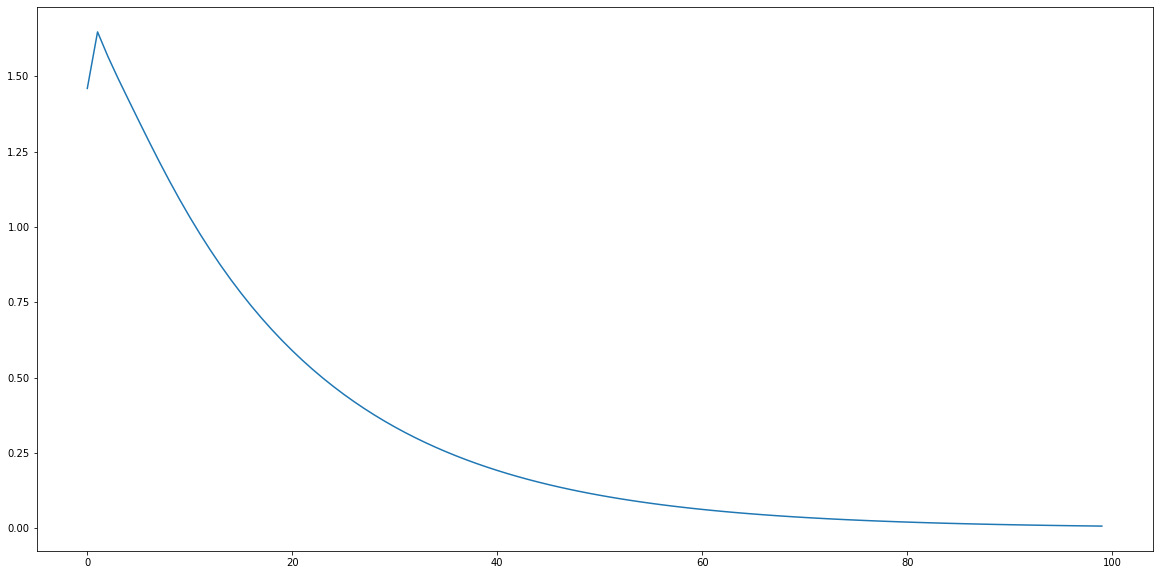

In [67]:

mundo1 = Mundo(4, 4, (0, 0), (3, 3), pcardeais4, actions4, [0,0,0,0])
agente = Agente(100)
deltas = agente.learn(mundo1, PolicyEvaluation)
#print()
#print(agente.melhor_caminho(mundo.inicio, mundo))
plt.figure(figsize=(20, 10))
plt.plot(deltas)

In [68]:
class PolicyIteration:
    def __init__(self, actions, row, col):
        self.posicao = (row, col)
        self.reward_value = -1
        self.value = 0
        #self.epsilon = 0.1  

    def explorar(self, actions ):
        action = self.explore(actions)
        return action  
    
    def explore(self, actions):
        action = random.choice(actions);
        self.indexActions = actions.index(action)
        return action

    def takeAction(self, action, mundo):  
        if mundo.is_fim(tuple(self.posicao)):
            return self.reward_value, self.posicao

        nova_posicao, movimento, inicio, fim = mundo.mover(self.posicao, action)
        self.reward_value
        if nova_posicao is None or inicio:
            nova_posicao = self.posicao

        return self.reward_value, tuple(nova_posicao)
    
    def policy(it, agente, states, mundo):
      deltaState = []
      gamma = 1.0
      for i in states:
        for state in i:
          values = [0 for a in mundo.actions];
          for i, action in enumerate(mundo.actions):
            reward, nova_posicao = state.takeAction(action, mundo)
            next_cell =  states[nova_posicao]
            values[i] += (1/len(mundo.actions))*(reward+(gamma*next_cell.value))
            if mundo.is_fim(nova_posicao):
              break

          novo_valor = max(values)
          deltaState.append(np.abs(state.value - novo_valor))
          state.value = novo_valor
      
      if it in [0,1,2,9, 99, agente.iterations-1]:
        agente.grid()
        print()
      #return deltaState
      return numpy.mean(deltaState)

###Policy Iteration

-0.25 -0.25 -0.25 -0.25 
-0.25 -0.25 -0.25 -0.25 
-0.3125 -0.25 -0.25 0 
-0.3125 -0.25 -0.25 0 

-0.3125 -0.3125 -0.3125 -0.3125 
-0.3125 -0.3125 -0.3125 -0.3125 
-0.328125 -0.3125 -0.25 0 
-0.328125 -0.25 -0.25 0 

-0.328125 -0.328125 -0.328125 -0.3125 
-0.328125 -0.328125 -0.3125 -0.3125 
-0.328125 -0.3125 -0.25 0 
-0.328125 -0.25 -0.25 0 

-0.333008 -0.332031 -0.328125 -0.3125 
-0.332031 -0.328125 -0.3125 -0.3125 
-0.328125 -0.3125 -0.25 0 
-0.328125 -0.25 -0.25 0 

-0.333008 -0.332031 -0.328125 -0.3125 
-0.332031 -0.328125 -0.3125 -0.3125 
-0.328125 -0.3125 -0.25 0 
-0.328125 -0.25 -0.25 0 

[0.2265625, 0.037109375, 0.0048828125, 0.000732421875, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


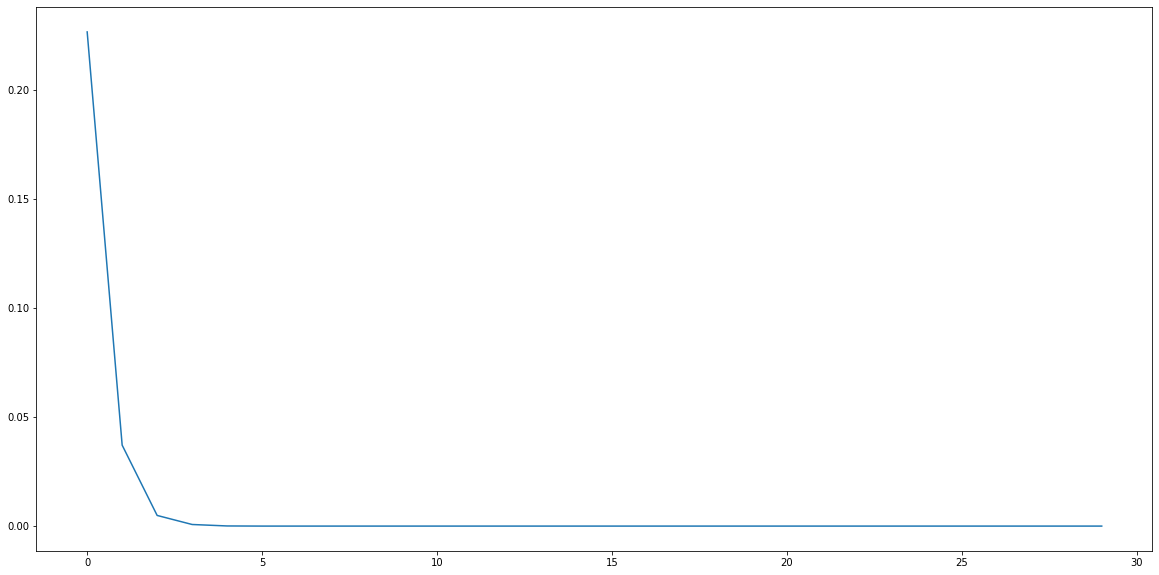

In [69]:
mundo2 = Mundo(4, 4, (0, 0), (3, 3), pcardeais4, actions4, [0,0,0,0])
agente2 = Agente(30)
deltas2 = agente2.learn(mundo2, PolicyIteration)
print(deltas2)
#print(agente2.melhor_caminho(mundo.inicio, mundo))
plt.figure(figsize=(20, 10))
plt.plot(deltas2)

###Resposta
Como podemos ver nos graficos com o umas 5 interações ja se chega em uma politica otima, com a **Policy Interation**
resultou em uma melhoria na velocidade de convergência da avaliação de políticas além de uma melhoria no numero de 
no número de interações

# EXERCÍCIO 2
2) Escolha um gridworld de preferência dentre os constantes na library de gridworlds e treine um agente nesse gridworld usando o método de Monte Carlo. Exiba uma demonstração do agente andando pelo gridworld após o treinamento realizado.

In [70]:
gamma = 0.6
reward_value = -1
grid_size = 4
terminal_states = [[0,0], [grid_size-1, grid_size-1]]
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]
iterations = 10000

In [71]:
V = np.zeros((grid_size, grid_size))
returns = {(i, j):list() for i in range(grid_size) for j in range(grid_size)}
deltas = {(i, j):list() for i in range(grid_size) for j in range(grid_size)}
states = [[i, j] for i in range(grid_size) for j in range(grid_size)]

In [72]:
def generateEpisode():
    posi1 = random.randint(grid_size)
    posi2 = random.randint(grid_size)
    init_state = (posi1, posi2)
    #print(states,init_state)
    #init_state = random.choice(states[1:-1])
    episode = []
    while True:
        if list(init_state) in terminal_states:
          return episode
        #action = random.choice(actions)
        p1 = random.randint(len(actions))
        action = actions[p1]
        final_state = np.array(init_state) + np.array(action)

        if -1 in list(final_state) or grid_size in list(final_state):
            final_state = init_state
        
        episode.append([list(init_state), action, reward_value, list(final_state)])
        init_state = final_state

In [73]:
for it in range(iterations):
    episode = generateEpisode()
    G = 0

    mediadelta = 1;
    if(it>1):
      ultimoserros = []
      all_series = [list(x)[1:] for x in deltas.values()]
      for posi in all_series:
        if(len(posi)>0):
          ultimoserros.append(posi[-1])
      mediadelta = np.mean(ultimoserros)
    
    if(mediadelta<0.001):
      print("total it",it)
      break

    episode = episode[::-1]
    for i, (initial_position, action, reward, final_position) in enumerate(episode):
        G = gamma * G + reward # Usa a propriedade recursiva do horizonte descontado
        # First-visit MC: só considera o retorno obtido se o estado não foi visitado
        # Every-visit MC: considera todos os retornos obtidos em visitas a um único estado
        if initial_position not in [x[0] for x in episode[len(episode)-i:]]:
            idx = tuple(initial_position)
            # Returns vai guardar o horizonte para este estado naquele momento
            returns[idx].append(G)
            new_value = np.average(returns[idx])
            deltas[idx].append(np.abs(V[idx] - new_value))
            V[idx] = new_value

total it 668


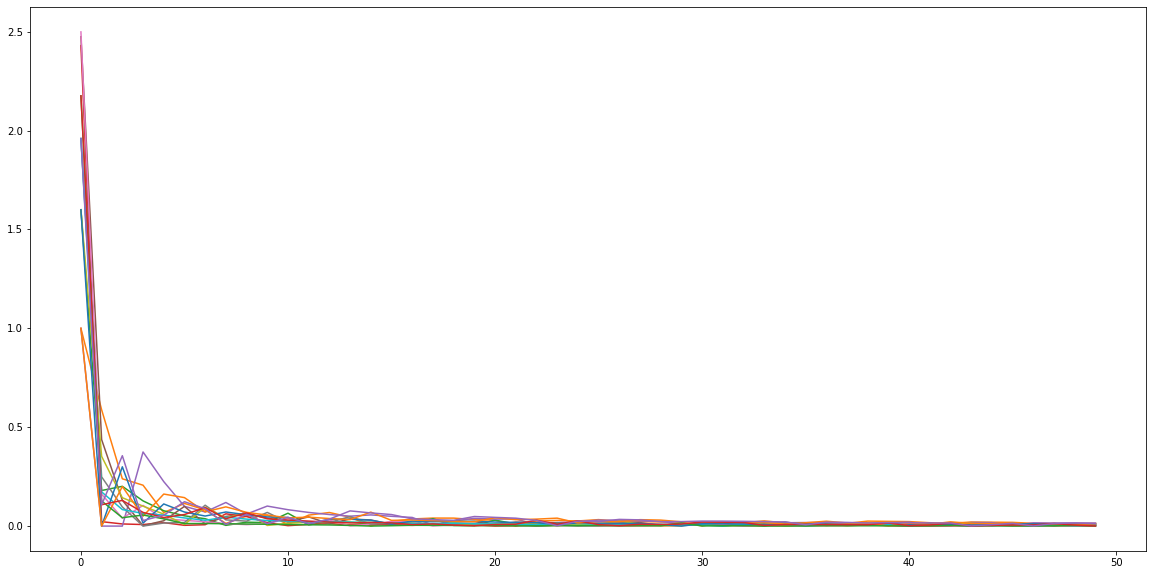

In [74]:
plt.figure(figsize=(20,10))
all_series = [list(x)[:50] for x in deltas.values()]
for series in all_series:
    plt.plot(series)

# EXERCÍCIO 3

3) Implemente agora o Sarsa no cenário **Windy Gridworld with King's Moves**. Esse cenário é o mesmo windy gridworld mas, dessa vez, há oito possíveis ações: as usuais e as ações nas diagonais.

Compare os resultados no grid com o cenário do exercício 3. Responda com base nos experimentos e plots: ter a disposição mais ações ajuda a acelerar a convergência do algoritmo? O caminho escolhido pelo agente muda?

In [81]:
class EpsilonGreedy:
    def __init__(self, actions, row, col):
        self.posicao = (row, col)
        self.epsilon = 0.08
        self.reward_value = -1
        self.value = 0
        self.values = [0 for a in actions];
        self.indexActions = -1;
        self.gamma = 1.0
        self.alpha = 0.6
        self.deltaState = []

    def explorar(self, actions ):
        p = np.random.random()
        if (p < self.epsilon):
            action = self.explore(actions)
        else:
            action = self.exploit(actions)       
        self.value = self.values[self.indexActions]
        return action  

    def exploit(self, actions):
        self.indexActions = self.values.index(max(self.values))
        action = actions[self.indexActions]
        return action

    def explore(self, actions):
        posi = random.randint(len(actions))
        action = actions[posi];
        self.indexActions = actions.index(action)
        return action

    def takeAction(self, action, mundo):  
        if mundo.is_fim(tuple(self.posicao)):
            return self.reward_value, self.posicao
        nova_posicao, movimento, inicio, fim = mundo.mover(self.posicao, action)
        self.reward_value
        
        if nova_posicao is None:
          return -2, self.posicao

        if nova_posicao is None or inicio:
            nova_posicao = self.posicao

        return self.reward_value, tuple(nova_posicao)
    
    def policy(it, agente, states, mundo):
      deltaState = []
      posi = random.randint(len(mundo.grade))
      posicao = mundo.grade[posi]
      posicao_i = posicao

      mundo.limpar_caminho_realizaso()
      sub = 0
      while True:
        
        sub += 1
        if sub>1000:
            break

        current_cell = states[posicao]
        action = current_cell.explorar(mundo.actions)
        reward, nova_posicao = current_cell.takeAction(action, mundo)

        if mundo.is_fim(nova_posicao):
          break
        
        next_cell =  states[nova_posicao]
        old_cell_value = current_cell.value

        #current_cell.value += current_cell.alpha * (reward + current_cell.gamma * next_cell.value - current_cell.value) #Sarsa
        current_cell.value += current_cell.alpha * (reward + current_cell.gamma * next_cell.values[current_cell.indexActions] - current_cell.value) #Sarsa
        #current_cell.value += current_cell.alpha * (reward + current_cell.gamma * np.max(next_cell.values) - current_cell.value)
        current_cell.values[current_cell.indexActions] = current_cell.value

        current_cell.deltaState.append( float(np.abs(old_cell_value - current_cell.value)) )
        
        if(len(deltaState)>50):
          deltaState.append( np.abs(old_cell_value - current_cell.value))
        
        posicao = nova_posicao
      
      if it in [100,200,1000,2000, 2500, agente.iterations-1]:
        print('it',it)
        agente.grid()
        print()
        #try:
        print(agente.melhor_caminho(mundo.inicio, mundo))
        #except:
        #  print('erro')
      #return numpy.mean(deltaState)
      return deltaState

###8 ações

it 100
-6.72061 -6.70558 -7.49317 -8.8163 -7.5783 -8.55855 -7.24883 -6.46067 -7.27838 -7.73289 
-6.84798 -6.96548 -6.91151 -6.90749 -8.68937 -7.54925 -5.19999 -5.57857 -5.25042 -5.26122 
-7.24728 -7.14091 -6.52963 -6.0296 -7.67339 -5.83667 -5.84888 -4.05507 -3.2 -3.84894 
-8.39574 -7.40594 -6.25629 -5.53318 -5.01704 -6.53247 -3.76347 -6.3511 -4.26716 -3.0 
-8.59851 -7.30162 -6.4024 -5.24702 -4.42185 -6.07133 -2.51008 -0.9744 -0.998362 -1.0 
-6.84651 -8.60574 -6.90189 -5.60226 -4.65632 -3.07553 -3.53227 -2.54779 -1.4352 -0.98976 
-8.8163 -7.92491 -6.02632 -6.32682 -6.05011 -3.98449 -1.82108 -1.68617 -0.6 -2.72282 
-7.56626 -6.24511 -4.2 -6.33878 -1.97215 0 0 -2.92916 -0.6 -0.6 
-6.82938 -5.52984 -4.1968 -2.2 -2.0 0 0 -0.6 0 -0.6 
-6.41477 -6.5372 -4.0576 -2.74956 -2.208 -1.55443 -1.3056 -0.6 -0.6 0 

[['_' '_' '_' '_' '_' '_' '_' '↘' '↘' '_']
 ['_' '_' '_' '_' '_' '_' '↘' '_' '_' '↘']
 ['_' '_' '_' '_' '_' '↦' '_' '_' '↤' '↧']
 ['_' '_' '↗' '↘' '↧' '_' '_' '_' '_' '↥']
 ['_' '↗' '_' '_'

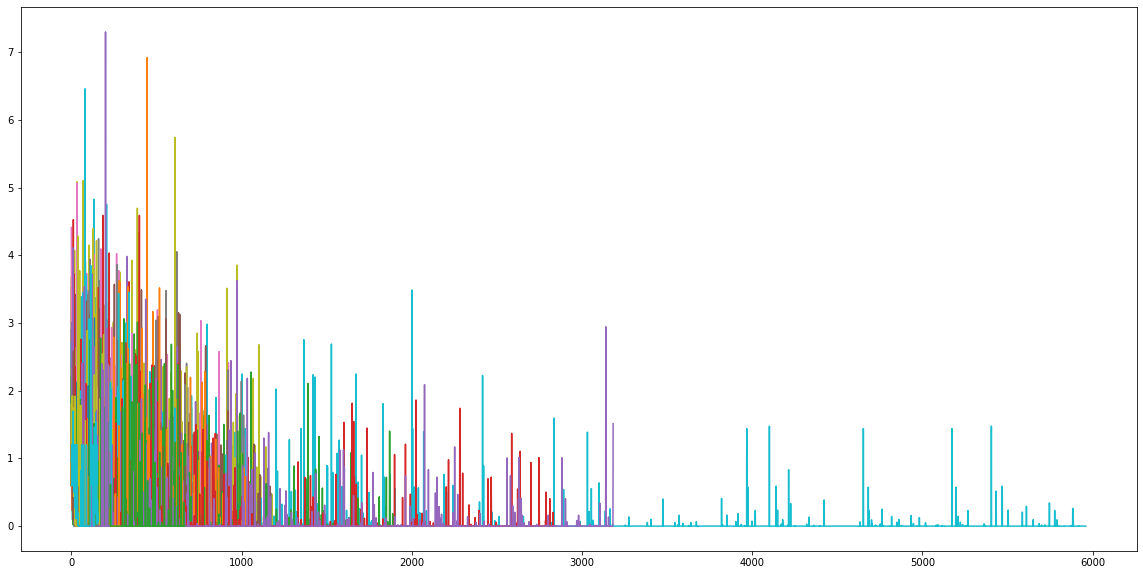

In [83]:
mundo4 = Mundo(10, 10, (5, 0), (5, 8), pcardeais8, actions8, [0,0,0,1,1,1,2,2,1,0])
agente4 = Agente(10000)
deltas4 = agente4.learn(mundo4, EpsilonGreedy)
print()
#print(agente4.melhor_caminho(mundo4.inicio, mundo4))
plt.figure(figsize=(20, 10))
#plt.plot(deltas4)
all_series=[]
for i in agente4.states:
  for j in i:
    all_series.append( list(j.deltaState)[:-50] )

for series in all_series:
    plt.plot(series)

###4 ações

it 100
-10.8076 -10.8143 -10.8979 -11.0825 -10.9702 -10.0633 -9.26481 -7.75209 -6.78298 -6.39345 
-10.8259 -10.7276 -10.6804 -10.3863 -10.0017 -9.40912 -7.81345 -6.35511 -5.82378 -5.43048 
-10.8607 -10.6283 -10.3632 -9.6213 -8.97568 -8.04789 -5.99532 -5.16599 -4.56783 -4.70575 
-11.1492 -10.755 -10.034 -8.82899 -7.46504 -5.43832 -2.53826 -1.99819 -3.10271 -2.99526 
-11.3084 -10.3717 -9.44918 -7.76627 -5.52101 -2.18162 -0.470839 -0.757237 -1.44957 -0.999906 
-8.85403 -9.97682 -8.8833 -6.08199 -2.85324 -0.990274 -0.133511 -0.143097 -0.143197 -0.38 
-9.90772 -9.00352 -7.61025 -5.20341 -2.35381 -0.38886 -0.147797 -0.135054 -0.167507 -0.2 
-8.77148 -7.35006 -6.08133 -4.33326 -2.8921 -1.32432 0 -0.12235 -0.1 -0.1 
-7.00563 -6.29897 -5.18143 -3.85962 -1.99895 0 -0.17999 0 0 0 
-6.49579 -5.59377 -3.99836 -1.87765 -0.46371 -0.19 0 -0.112099 -0.1 0 

[['_' '_' '_' '_' '_' '_' '_' '↦' '_' '_']
 ['_' '_' '_' '_' '_' '_' '_' '_' '_' '_']
 ['_' '_' '_' '_' '_' '_' '↧' '_' '_' '_']
 ['_' '_' '_' '_' 

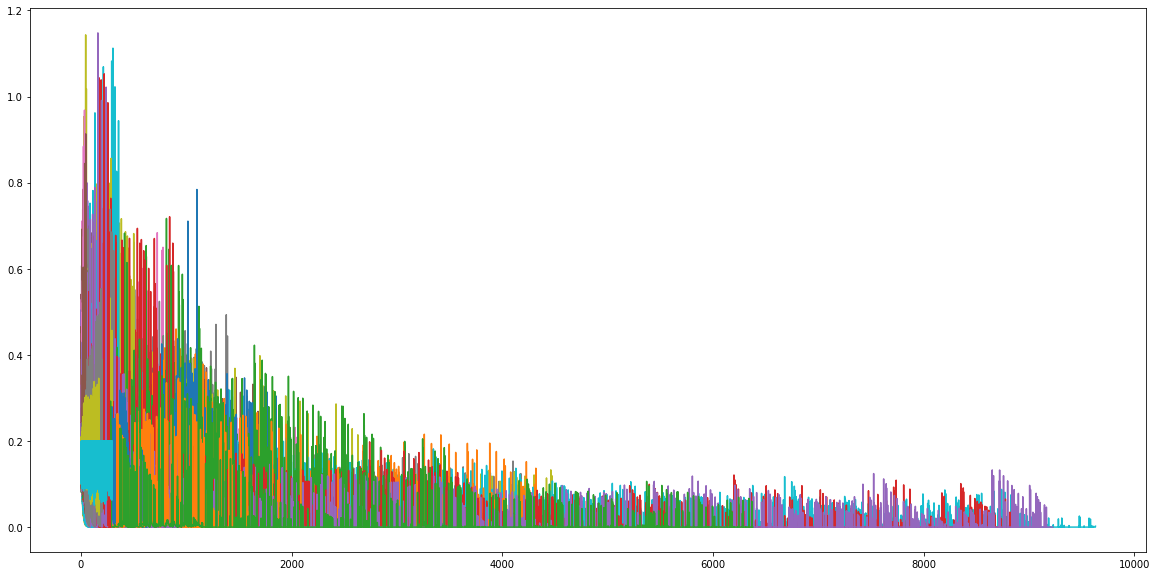

In [59]:
mundo4 = Mundo(10, 10, (5, 0), (5, 8), pcardeais4, actions4, [0,0,0,1,1,1,2,2,1,0])
agente4 = Agente(10000)
deltas4 = agente4.learn(mundo4, EpsilonGreedy)
print()
#print(agente4.melhor_caminho(mundo4.inicio, mundo4))
plt.figure(figsize=(20, 10))

all_series=[]
for i in agente4.states:
  for j in i:
    all_series.append( list(j.deltaState)[:-50] )

#all_series = [list(s.deltaState)[:50] for s in agente4.states]
for series in all_series:
    plt.plot(series)
#plt.plot(all_series)
#print(agente4.melhor_caminho(mundo4.inicio, mundo4))

###Resposta
Com mais ações ajuda a convegir em menos interações. O caminho escolhido é semelhante


# EXERCÍCIO 4

4) Considere uma nova variação do windy gridworld com king's move. Assuma que o efeito do vento, quando há algum, é estocástico, algumas vezes variando 1 unidade da média especificada em cada coluna. Ou seja, 1/3 das vezes o movimento é dado exatamente por estes valores, como no exercício anterior, mas 1/3 das vezes você move-se 1 célula acima do esperado e no último 1/3 das vezes você move 1 célula abaixo do valor esperado para o vento naquela coluna. Exiba e analise a trajetória do agente nesse gridworld.

it 100
-5.80796 -6.31079 -6.97555 -9.75 -7.8922 -8.78857 -8.9282 -21.3281 -7.04638 -7.03587 
-6.14815 -6.51216 -6.46287 -7.15899 -8.13538 -8.80423 -7.48151 -6.95792 -6.85618 -11.8125 
-10.4034 -7.7666 -6.56169 -8.41406 -6.80298 -6.32962 -5.86189 -5.73437 -6.28191 -5.0 
-7.50531 -6.82837 -6.52458 -5.77546 -5.19173 -5.74989 -4.11182 -6.0625 -3.7117 -3.0 
-8.471 -8.02884 -6.71191 -7.06158 -4.45383 -4.52042 -2.28906 -0.9375 -0.999878 -1.0 
-5.74921 -8.34961 -8.66589 -6.22012 -5.71719 -2.95654 -2.77823 -1.82227 -2.36719 -1.3125 
-17.6738 -7.97529 -8.28074 -6.65259 -3.56067 -1.70312 -1.75 -2.71069 -1.61075 0 
-8.40088 -7.99503 -13.5781 -4.75031 -1.99878 0 -2.6875 0 -0.5 -0.5 
-8.01367 -6.0 -5.99487 -4.0 -2.0 0 -3.34375 0 -0.5 0 
-12.5391 -14.375 -7.46289 -17.1094 -3.0 -5.25 -0.9375 0 -0.5 -0.5 

[['_' '_' '_' '_' '_' '_' '_' '_' '_' '_']
 ['_' '_' '_' '_' '_' '_' '_' '_' '_' '_']
 ['_' '_' '_' '_' '_' '_' '_' '_' '_' '_']
 ['_' '_' '_' '_' '_' '_' '_' '_' '_' '_']
 ['_' '_' '_' '_' '_' '_' '

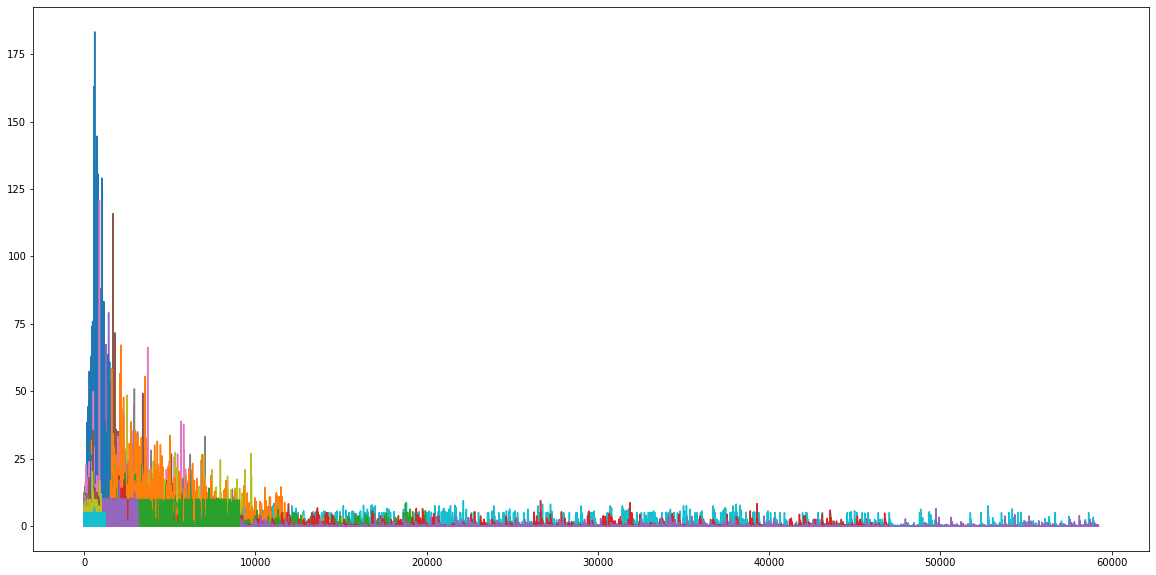

In [48]:
mundo4 = Mundo(10, 10, (5, 0), (5, 8), pcardeais8, actions8, [0,0,0,1,1,1,2,2,1,0], True)
agente4 = Agente(100000)
deltas4 = agente4.learn(mundo4, EpsilonGreedy)
print()
#print(agente4.melhor_caminho(mundo4.inicio, mundo4))
plt.figure(figsize=(20, 10))

all_series=[]
for i in agente4.states:
  for j in i:
    all_series.append( list(j.deltaState)[:-50] )

#all_series = [list(s.deltaState)[:50] for s in agente4.states]
for series in all_series:
    plt.plot(series)
#plt.plot(all_series)

# EXERCÍCIO 5

5) Implemente o cenário do "The Cliff", apresentado em sala de aula. Utilize tanto o Sars quanto o Q-learning. Faça comparações dos resultados com a política greedy do agente após 100, 1000 e 10000 episódios.

OBS.: utilize uma estratégia epsilon-greedy para a dinâmica do agente. Especifique hiperparâmetros de forma a conseguir convergência do algoritmo.

In [84]:
ROWS = 4
COLS = 12
S = (3, 0)
G = (3, 11)

In [85]:
class Mundo_cliff:
  def __init__(self):
        self.end = False
        self.reward = 0
        self.create_grid()

  def create_grid(self):
      self.pos = S
      self.grid = np.zeros([ROWS, COLS])
      self.grid[3, 1:11] = -1

  def step(self, action):
        if action == "UP":
            next = (self.pos[0] - 1, self.pos[1])
        elif action == "DOWN":
            next = (self.pos[0] + 1, self.pos[1])
        elif action == "LEFT":
            next = (self.pos[0], self.pos[1] - 1)
        else:
            next = (self.pos[0], self.pos[1] + 1)

        if next[0] >= 0 and next[0] <= 3:
            if next[1] >= 0 and next[1] <= 11:
                self.pos = next

        if self.pos == G:
            self.end = True
            self.reward = 0
            # print('VENCEU')
        elif self.grid[self.pos] == -1:
            self.end = True
            self.reward = -100
            # print('PERDEUU')
        else:
            self.reward = -1

        return self.pos

  def draw(self, states):
    for i in range(0, ROWS):
        print('-------------------------------------------------')
        out = '| '
        for j in range(0, COLS):
            token = '0'
            if self.grid[i, j] == -1:
                token = '*'
            if (i, j) in states:
                token = 'N'
            if (i, j) == G:
                token = 'G'
            out += token + ' | '
        print(out)
    print('-------------------------------------------------') 

In [86]:
class Player():
  def __init__(self, epsilon=0.3, lr=0.1, sarsa=True):
        self.mundo = Mundo_cliff()
        self.actions = ["UP", "LEFT", "RIGHT", "DOWN"]
        self.states = []  
        self.pos = S
        self.epsilon = epsilon
        self.lr = lr
        self.sarsa = sarsa
        self.state_actions = {}
        for i in range(ROWS):
            for j in range(COLS):
                self.state_actions[(i, j)] = {}
                for a in self.actions:
                    self.state_actions[(i, j)][a] = 0

  def greedy_policy(self):
        mx_nxt_reward = -999
        action = ""

        if np.random.uniform(0, 1) <= self.epsilon:
            action = np.random.choice(self.actions)
        else:
            # greedy action
            for a in self.actions:
                current_position = self.pos
                nxt_reward = self.state_actions[current_position][a]
                if nxt_reward >= mx_nxt_reward:
                    action = a
                    mx_nxt_reward = nxt_reward
        return action

  def reset(self):
        self.states = []
        self.mundo = Mundo_cliff()
        self.pos = S

  def play(self, episodes=10):
        for _ in range(episodes):
            while 1:
                curr_state = self.pos
                cur_reward = self.mundo.reward
                action = self.greedy_policy()

                # proxima ...
                self.mundo.pos = self.mundo.step(action)
                self.pos = self.mundo.pos

                self.states.append([curr_state, action, cur_reward])
                if self.mundo.end:
                    break
            reward = self.mundo.reward
            for a in self.actions:
                self.state_actions[self.pos][a] = reward

            if self.sarsa:
                for s in reversed(self.states):
                    pos, action, r = s[0], s[1], s[2]
                    current_value = self.state_actions[pos][action]
                    reward = current_value + self.lr * (r + reward - current_value)
                    self.state_actions[pos][action] = round(reward, 3)
            else:
                for s in reversed(self.states):
                    pos, action, r = s[0], s[1], s[2]
                    current_value = self.state_actions[pos][action]
                    reward = current_value + self.lr * (r + reward - current_value)
                    self.state_actions[pos][action] = round(reward, 3)
                    reward = np.max(list(self.state_actions[pos].values()))  

            self.reset()

In [87]:
print("Q-Learning")
episodios = [1000,10000]
ag = Player(epsilon=0.1, sarsa=False)
for a in episodios:
  print(" Numero de episodios ->  ", a)
  ag.play(episodes=a)

  # Q-learning
  ag_op = Player(epsilon=0)
  ag_op.state_actions = ag.state_actions

  states = []
  while 1:
      curr_state = ag_op.pos
      action = ag_op.greedy_policy()
      states.append(curr_state)
      # next position
      ag_op.mundo.pos = ag_op.mundo.step(action)
      ag_op.pos = ag_op.mundo.pos

      if ag_op.mundo.end:
          break

  ag_op.mundo.draw(states)


Q-Learning
 Numero de episodios ->   1000
-------------------------------------------------
| 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 
-------------------------------------------------
| 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 
-------------------------------------------------
| N | N | N | N | N | N | N | N | N | N | N | N | 
-------------------------------------------------
| N | * | * | * | * | * | * | * | * | * | * | G | 
-------------------------------------------------
 Numero de episodios ->   10000
-------------------------------------------------
| 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 
-------------------------------------------------
| 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 
-------------------------------------------------
| N | N | N | N | N | N | N | N | N | N | N | N | 
-------------------------------------------------
| N | * | * | * | * | * | * | * | * | * | * | G | 
-------------------------------------------------


<EM CONSTRUÇÃO>